In [1]:
# !python -m pip install inflect
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4')
from TF3D import Idf3Model
from crawler.api.crawler_config import CrawlerConfig
from crawler.api.github_crawler import GithubCrawler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import label_ranking_average_precision_score, f1_score
from sklearn.model_selection import train_test_split


In [2]:
topics = ['CV','RL','NLP']
proxies = {'http': 'http://proxy.jpmchase.net:10443','https':'http://proxy.jpmchase.net:10443'}
crawler_config = CrawlerConfig('dataset/', 3, 0, False, proxies=proxies,reload_features=False)
crawler = GithubCrawler(crawler_config)
crawler.scrap(topics, limit=-1)

  0%|          | 0/3 [00:00<?, ?it/s]

dataset/results_csv.csv
                                            full_name  star_count language  \
0                           Snawoot_workua-cv-updater           3   python   
1                                krax1337_bts-resumes           3   python   
2                 wangwenhaoxiaotie_Document_classify           3   python   
3           AimoreRRD_Reinforcement-Learning-Research           3   python   
4                seolhokim_BipedalWalker-BranchingDQN           3   python   
5                                     benibienz_TAMER           3   python   
6                                      codebasic_pyko           3   python   
7                 carrliitos_NLPInformationExtraction           3   python   
8                               pemagrg1_Japanese-NLP           3   python   
9                               LehiChiang_CV_toolkit           3   python   
10                      gaoyuanliang_cheque_detection           3   python   
11                                  hack

100%|██████████| 3/3 [00:09<00:00,  3.16s/it]


In [3]:
topics=crawler.match_topics_to_featured(['CV','RL','NLP'],0.8)

In [4]:
data_description=os.path.join('dataset', 'results_csv.csv')
dataset = pd.read_csv(data_description)
train, test = train_test_split(dataset['full_name'].tolist()[:5], test_size=0.4)
tfidf=Idf3Model.Tf3D('dataset', topics, items_train=train, items_val=[], items_test=test)

Tf3D for tagging topics


  0%|          | 0/3 [00:00<?, ?it/s]

structure size: (133, 3132)


100%|██████████| 3/3 [00:00<00:00, 75.73it/s]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00, 102.26it/s]


0.9999999999999992
['Computervision', 'Reinforcementlearning']


In [5]:
red=tfidf.data_red[~tfidf.data_red['path'].str.contains('site-package')]
tfidf.X[red.index]


<17x3132 sparse matrix of type '<class 'numpy.int64'>'
	with 1223 stored elements in Compressed Sparse Row format>

  0%|          | 0/2 [00:00<?, ?it/s]

Computervision
['forward']
[] 0.0 [1 0] AimoreRRD_Reinforcement-Learning-Research 48    False
51    False
67    False
70    False
72    False
82    False
83    False
85    False
86    False
88    False
89    False
90    False
91    False
92    False
Name: path, dtype: bool


IndexError: invalid index to scalar variable.

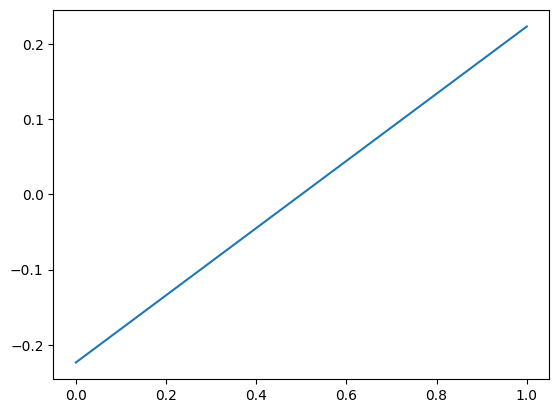

In [6]:
tfidf.calc_embedding()


In [ ]:
regressor = RandomForestRegressor(max_features="sqrt")
regressor.fit(tfidf.x_tr, tfidf.le_train)
predicted = regressor.predict(tfidf.x_te)
label_ranking_average_precision_score(tfidf.le_test, predicted)

0.8030303030303029

In [ ]:
classifier = RandomForestClassifier(max_features=8)
classifier.fit(tfidf.x_tr, tfidf.le_train)
predicted = classifier.predict(tfidf.x_te)
f1_score(tfidf.le_test, predicted,average='micro')

0.5555555555555556

In [1]:
import pandas as pd
import os
import warnings
import sys
print(os.getcwd())
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4')
# sys.path.insert(1, 'C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\crawler\\api\crawler_config')
warnings.filterwarnings('ignore')
from crawler.api.crawler_config import CrawlerConfig
from crawler.api.github_crawler import GithubCrawler
import pycg

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import label_ranking_average_precision_score, f1_score
from sklearn.model_selection import train_test_split

topics = ['NLP','Machinelearning','Deeplearning','Database', 'Django','RL','Tensorflow','Etereum','Computervision','Bot','Hacktoberfest','Algorithm','Bitcoin','Cryptocurrency','Flask','Security','Docker','Linux','API','COVID-19']
print(len(topics))
proxies = {'http': 'http://proxy.jpmchase.net:10443','https':'http://proxy.jpmchase.net:10443'}
crawler_config = CrawlerConfig('dataset/', 3, 0, False,proxies=proxies)
crawler = GithubCrawler(crawler_config)
crawler.scrap(topics, limit=-1)

topics = ['NLP','Machinelearning','Deeplearning','Database', 'Django','RL','Tensorflow','Etereum','Computervision','Bot','Hacktoberfest','Algorithm','Bitcoin','Cryptocurrency','Flask','Security','Docker','Linux','API','COVID-19']
topics=crawler.match_topics_to_featured(topics,0.8)
print(topics)

c:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples
20


  0%|          | 0/20 [00:00<?, ?it/s]

dataset/results_csv.csv


100%|██████████| 20/20 [01:00<00:00,  3.03s/it]


['Naturallanguageprocessing', 'Machinelearning', 'Deeplearning', 'Database', 'Django', 'Reinforcementlearning', 'Tensorflow', 'Ethereum', 'Computervision', 'Bot', 'Hacktoberfest', 'Algorithm', 'Bitcoin', 'Cryptocurrency', 'Flask', 'Security', 'Docker', 'Linux', 'API', 'COVID-19']


In [2]:
import os
num_sampling_scripts = [2,5,10,15]
for sampling_scripts in num_sampling_scripts:
    print("python C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\Topical\\run.py --dataset C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples\dataset\\resources_num_sampling_scripts_{}.pkl --topics ".format(sampling_scripts) + ''.join([topic + ' ' for topic in topics]))


python C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\Topical\run.py --dataset C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples\dataset\resources_num_sampling_scripts_2.pkl --topics Naturallanguageprocessing Machinelearning Deeplearning Database Django Reinforcementlearning Tensorflow Ethereum Computervision Bot Hacktoberfest Algorithm Bitcoin Cryptocurrency Flask Security Docker Linux API COVID-19 
python C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\Topical\run.py --dataset C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples\dataset\resources_num_sampling_scripts_5.pkl --topics Naturallanguageprocessing Machinelearning Deeplearning Database Django Reinforcementlearning Tensorflow Ethereum Computervision Bot Hacktoberfest Algorithm Bitcoin Cryptocurrency Flask Security Docker Linux API COVID-19 
python C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\Topical\run.py --dataset C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples\dataset\resources_num_sampling_scripts_10.pkl --topics Naturallanguag

In [22]:
import pickle as pkl
num_sampling_scripts = [15]
for sampling_scripts in num_sampling_scripts:
    df = pkl.load(open("C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples\output\\resources_0_{}.pkl".format(sampling_scripts),'rb'))
    for i in range(1,16):
        df2 = pkl.load(open("C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples\output\\resources_{}_{}.pkl".format(i,sampling_scripts),'rb'))
        df = df.append(df2)
    pkl.dump(df, open("C:\JPMC\DEV\TMP\ds\Topical\senatus-code-s4\examples\\dataset\\resources_num_sampling_scripts_{}.pkl".format(sampling_scripts),'wb'))
    print(df.shape)


(816, 5)
(816, 5)
(816, 5)
(816, 5)


Text(0.5, 0, 'Number of Sampled Scripts')

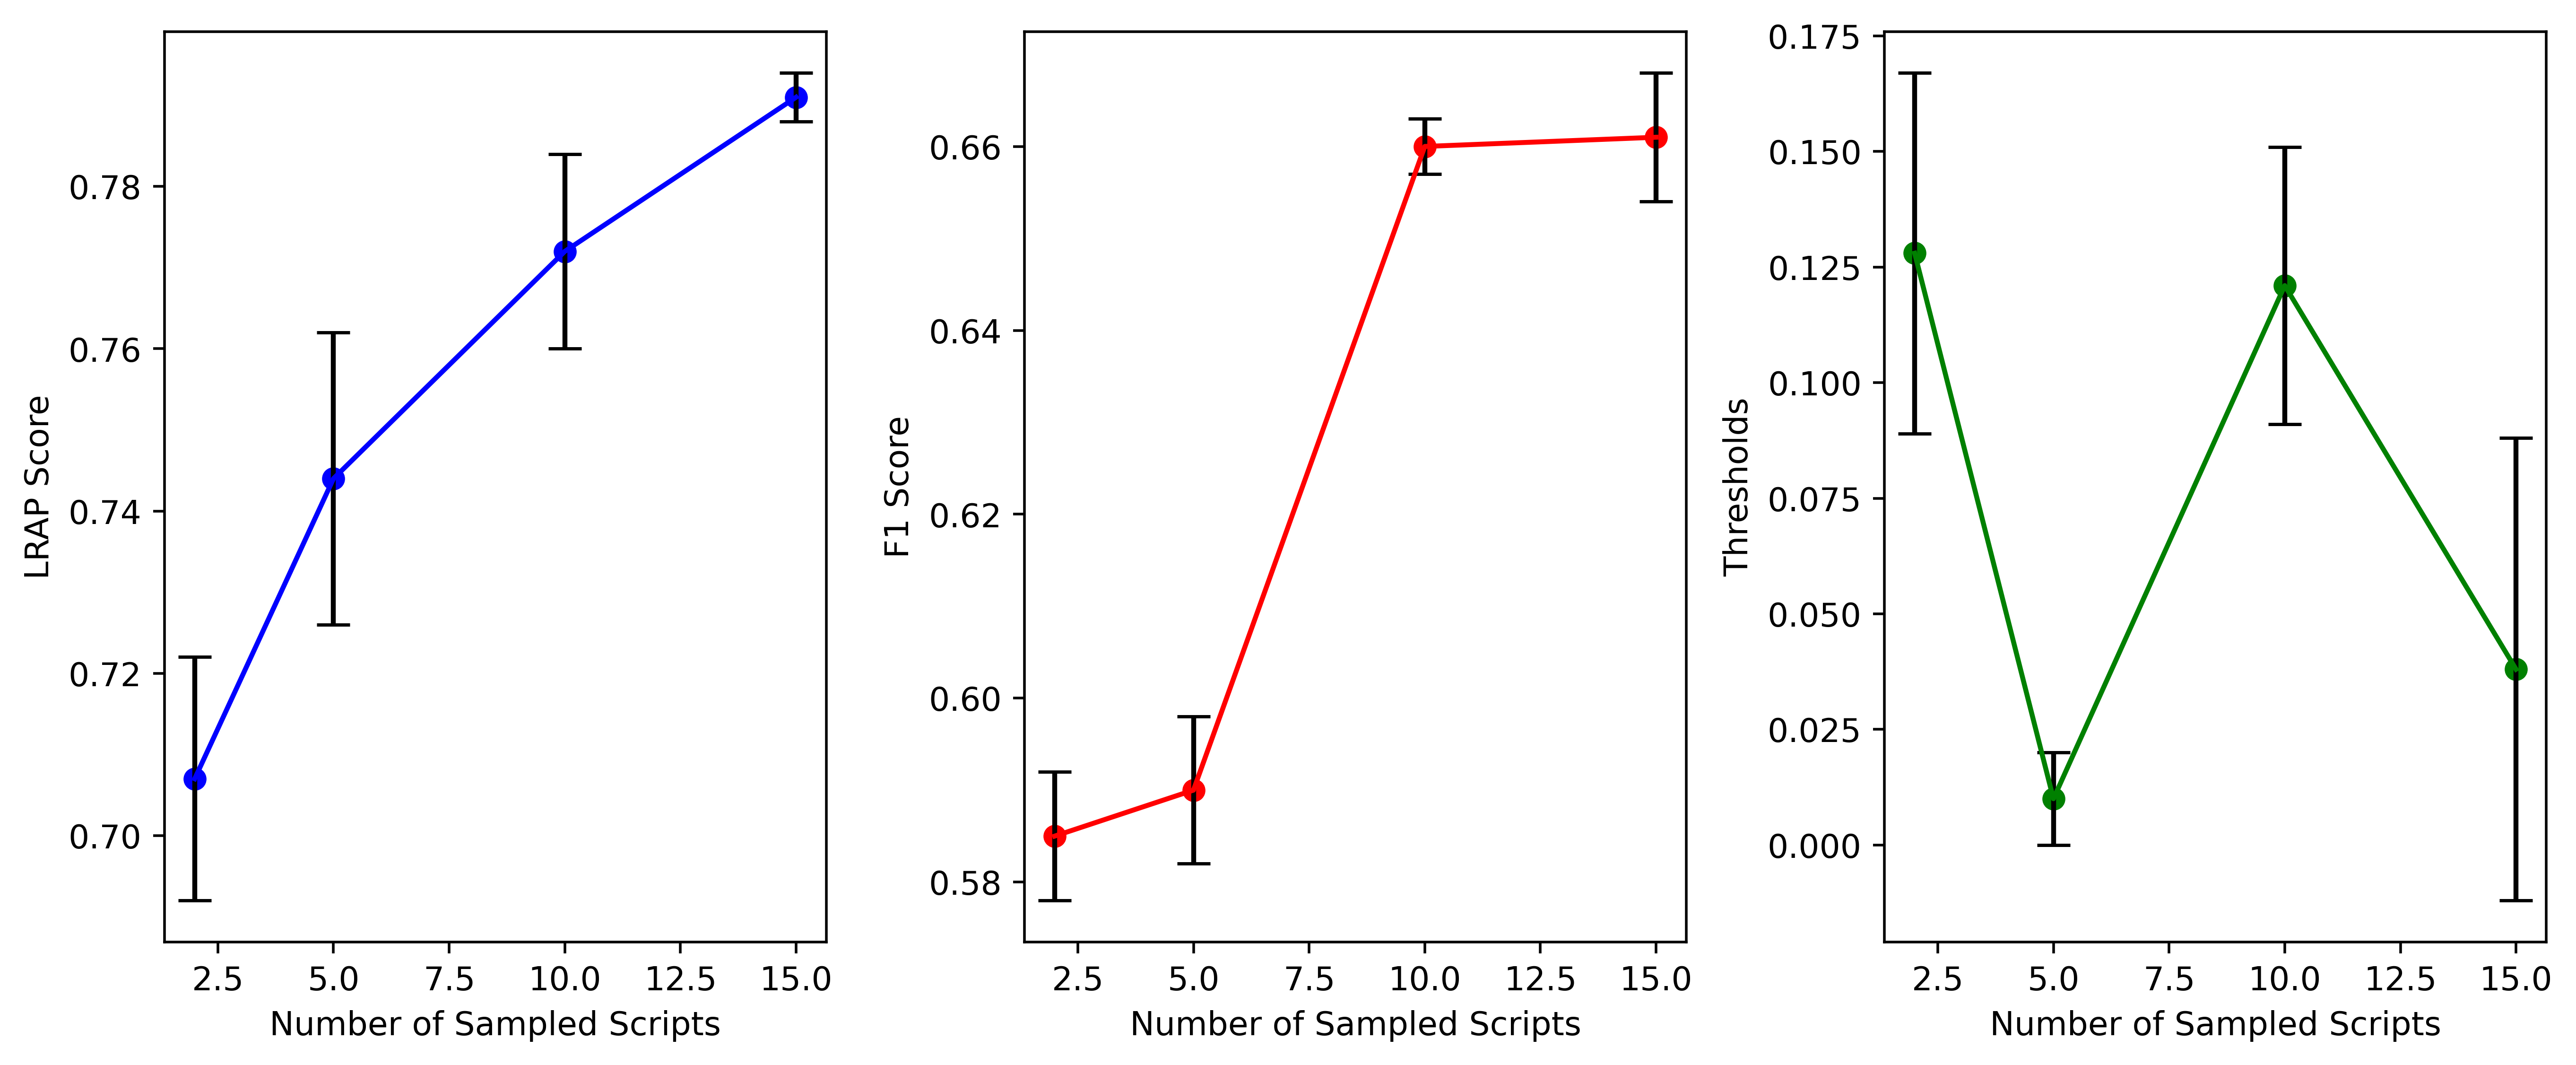

In [35]:
import matplotlib.pyplot as plt

# LRAP: 0.707 (0.015)
# recall: 0.656 (0.054)
# precision: 0.553 (0.037)
# f1-score: 0.585 (0.007)
# threshold: 0.128 (0.039)
# support: 149.0)
# ------------------------
# LRAP: 0.744 (0.018)
# recall: 0.809 (0.018)
# precision: 0.466 (0.015)
# f1-score: 0.581 (0.008)
# threshold: 0.01 (0.0)
# support: 147.7)
# ------------------------
# LRAP: 0.772 (0.012)
# recall: 0.733 (0.005)
# precision: 0.62 (0.012)
# f1-score: 0.66 (0.003)
# threshold: 0.121 (0.03)
# support: 149.6)
# ------------------------
# LRAP: 0.778 (0.003)
# recall: 0.826 (0.037)
# precision: 0.564 (0.036)
# f1-score: 0.66 (0.007)
# threshold: 0.038 (0.055)
# support: 148.8)
# ------------------------

num_sampling_scripts = [2,5,10,15]
lraps = [0.707, 0.744,0.772,0.791]
f1 = [0.585,0.590,0.660,0.661]
stds_lraps = [0.015,0.018,0.012,0.003]
stds_f1 = [0.007,0.008,0.003,0.007]
thresholds = [0.128,0.01,0.121,0.038]
thresholds_std = [0.039,0.01,0.03,0.05]

fig, ax = plt.subplots(1,3,figsize=(13,5))
plt.subplots_adjust(wspace=0.3)
fig.set_dpi(500)
ax[0].errorbar(num_sampling_scripts,lraps,yerr = stds_lraps,capsize=5,ecolor='k',color='b')
ax[0].scatter(num_sampling_scripts,lraps,color='b')
ax[0].set_xlabel("Number of Sampled Scripts")
ax[0].set_ylabel("LRAP Score")

ax[1].errorbar(num_sampling_scripts,f1,yerr = stds_f1,capsize=5,ecolor='k',color='r')
ax[1].scatter(num_sampling_scripts,f1,color='r')
ax[1].set_ylabel("F1 Score")
ax[1].set_xlabel("Number of Sampled Scripts")

ax[2].errorbar(num_sampling_scripts,thresholds,yerr = thresholds_std,capsize=5,ecolor='k',color='g')
ax[2].scatter(num_sampling_scripts,thresholds,color='g')
ax[2].set_ylabel("Thresholds")
ax[2].set_xlabel("Number of Sampled Scripts")


Text(0, 0.5, 'F1 Score')

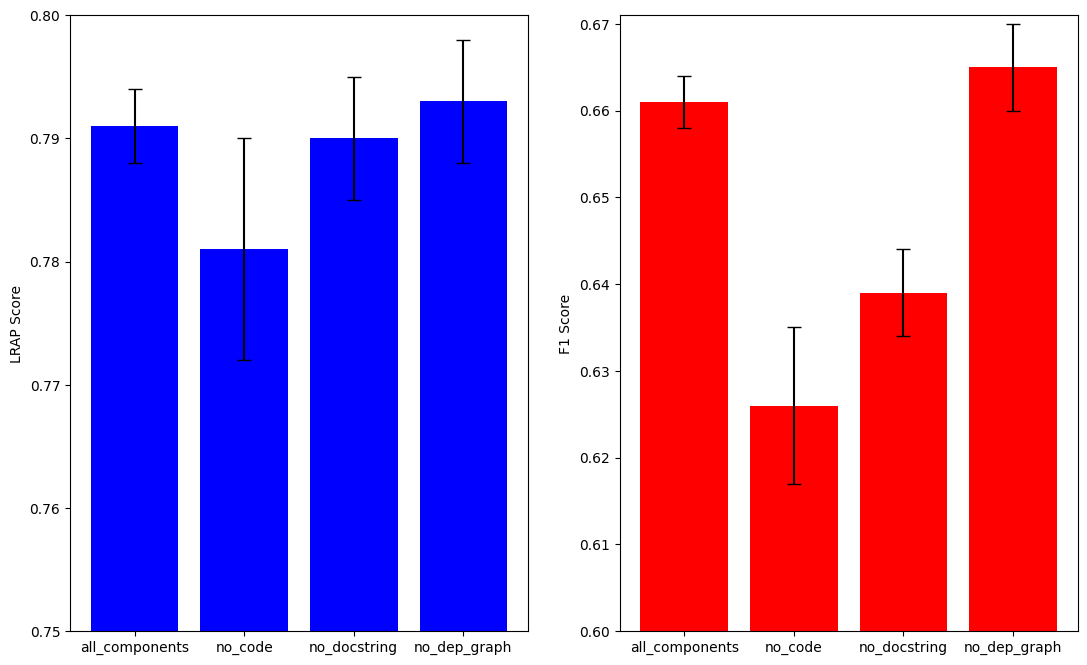

In [49]:
# topical_f1 = [0.75,0.585,0.58,0.537]
# gcb_f1 = [0.725,0.57,0.555,0.47]
# tf3d_f1 = [0.71,0.5,0.435,0.41]
# i2vca_f1 = [0.74,0.615,0.51,0.44]
# i2vcl_f1 = [0.688,0.553,0.5,0.41]
# i2vma_f1 = [0.71,0.488,0.401,0.34]
# i2vml_f1 = [0.515,0.335,0.35,0.29]
# num_topics = [5,10,15,20]

# arrx = [topical_f1,gcb_f1,tf3d_f1,i2vca_f1,i2vcl_f1,i2vma_f1,i2vml_f1]
# legend = ['Topical','GraphCodeBERT','TF3D','I2V-conc-attn','I2V-conc-lin','I2V-mean-attn','I2V-mean-lin']

# fig,ax = plt.subplots(1,1,figsize=(13,8))
# fig.set_dpi(500)
# for arr in arrx:
#     ax.plot(num_topics,arr)
#     ax.scatter(num_topics,arr)

xlabels = ['all_components','no_code','no_docstring','no_dep_graph']
f1_scores = [0.661,0.626,0.639,0.665]
lrap_scores = [0.791,0.781,0.79,0.793]
std_f1 = [0.015,0.004,0.01,0.014]
std_lrap = [0.003,0.009,0.005,0.005]


fig, ax = plt.subplots(1,2,figsize=(13,8))

ax[0].bar(xlabels,lrap_scores,color='b',yerr=std_lrap,capsize=5)
ax[0].set_ylim(0.75,0.8)
ax[0].set_ylabel("LRAP Score")
ax[1].bar(xlabels,f1_scores,color='r',yerr=std_lrap,capsize=5)
ax[1].set_ylim(0.6,0.671)
ax[1].set_ylabel("F1 Score")



Text(0, 0.5, 'F1 Score')

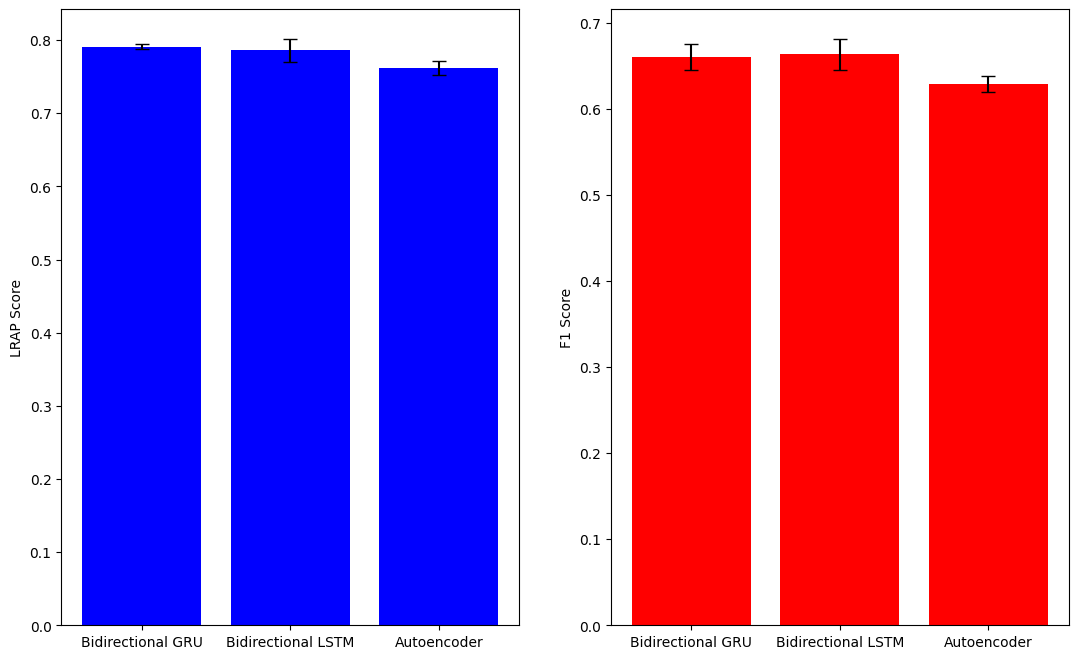

In [60]:
xlabels = ['Bidirectional GRU','Bidirectional LSTM','Autoencoder']
f1_scores = [0.661,0.664,0.629]
f1_std = [0.015,0.018,0.009]

lrap_scores = [0.791,0.786,0.762]
lrap_std = [0.003,0.016,0.01]

fig,ax = plt.subplots(1,2,figsize=(13,8))

ax[0].bar(xlabels,lrap_scores,yerr=lrap_std,color='b',alpha=1,capsize=5)
ax[1].bar(xlabels,f1_scores,yerr=f1_std,color='r',alpha=1,capsize=5)
ax[0].set_ylabel("LRAP Score")
ax[1].set_ylabel("F1 Score")

Text(0, 0.5, 'F1 Score')

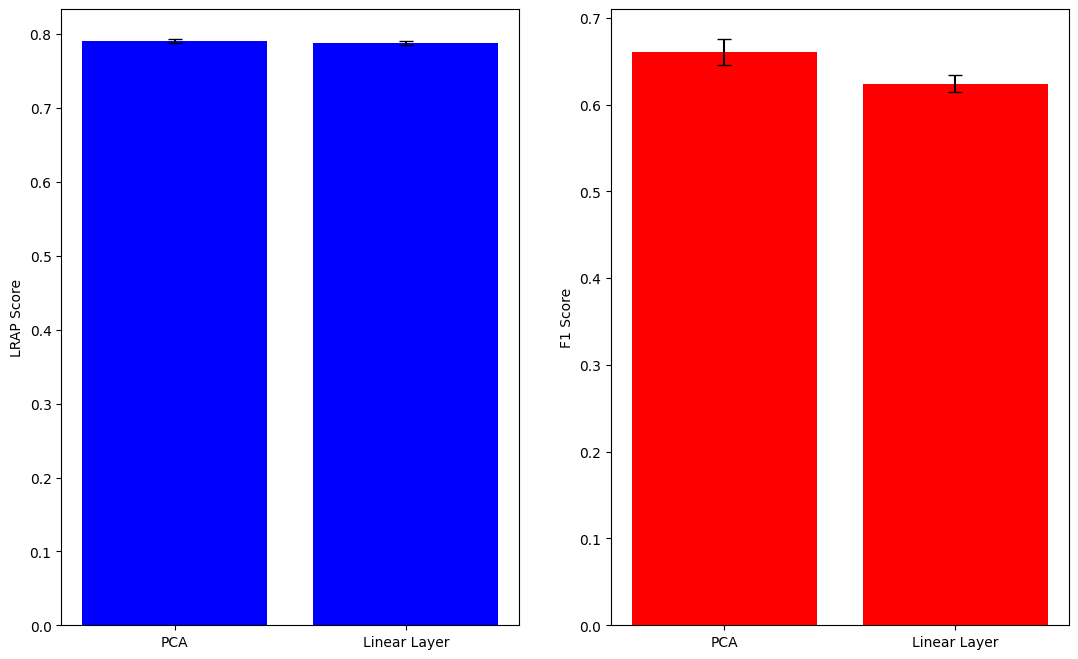

In [2]:
import matplotlib.pyplot as plt
xlabels = ['PCA','Linear Layer']
f1_scores = [0.661,0.624]
f1_std = [0.015,0.01]

lrap_scores = [0.791,0.788]
lrap_std = [0.003,0.003]

fig,ax = plt.subplots(1,2,figsize=(13,8))

ax[0].bar(xlabels,lrap_scores,yerr=lrap_std,color='b',alpha=1,capsize=5)
ax[1].bar(xlabels,f1_scores,yerr=f1_std,color='r',alpha=1,capsize=5)
ax[0].set_ylabel("LRAP Score")
ax[1].set_ylabel("F1 Score")
